<a href="https://colab.research.google.com/github/Viniciusp67/Algoritmos-de-Classifica-o-Agrupamento-e-Associa-o/blob/main/Kmeans_Teste1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Bibliotecas e Dataset e normalizando os dados

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [10]:
df = pd.read_csv("Wholesale_customers_data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [14]:
X = df[['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Método do Cotovelo

In [15]:
inertia = []
K = range(1,11)

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

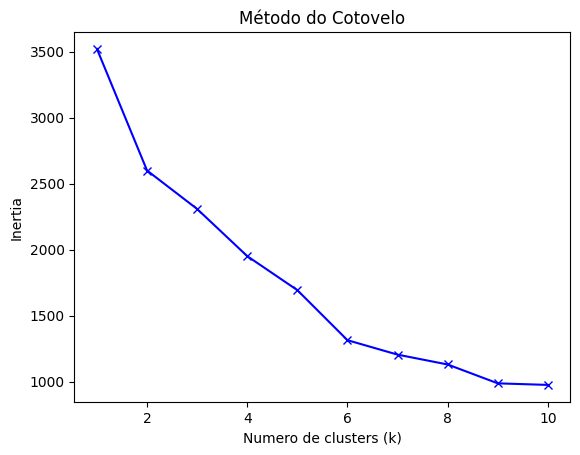

In [17]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo')
plt.show()

Treinamento do Modelo

In [24]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


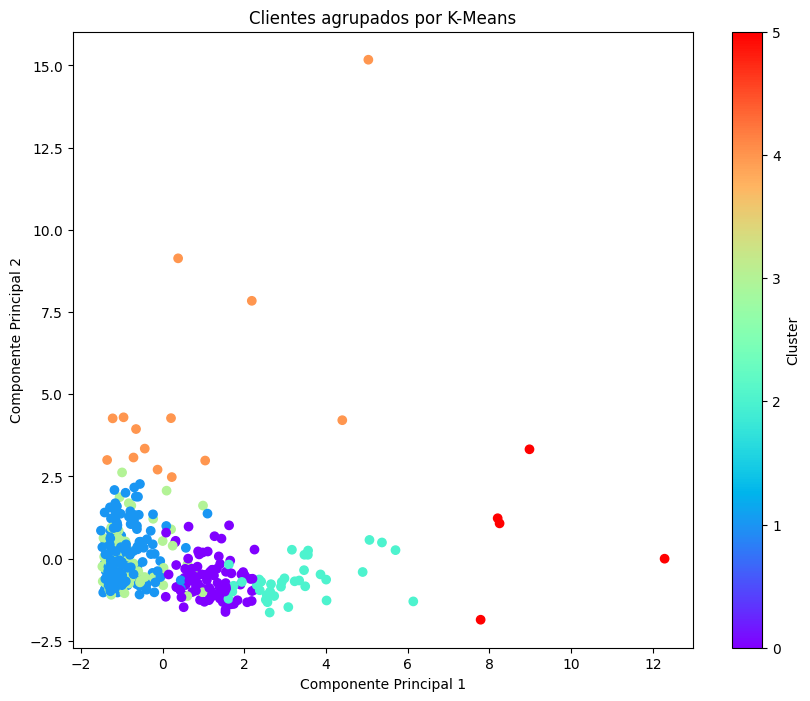

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clientes agrupados por K-Means')
plt.colorbar(label='Cluster')
plt.show()

In [26]:
df.groupby('Cluster').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,2.000000,2.872340,9247.510638,7378.914894,11326.425532,1350.787234,4691.000000,1427.510638
1,1.000000,3.000000,11941.285000,3060.570000,3497.935000,2950.780000,755.690000,1101.195000
2,2.000000,2.138889,5120.138889,15200.000000,24568.500000,1612.194444,11745.416667,2072.527778
3,1.065934,1.307692,11874.087912,3253.483516,4191.296703,3265.021978,899.285714,1134.461538
4,1.071429,2.785714,44980.428571,13146.785714,11504.000000,19013.142857,1516.000000,8937.642857
5,2.000000,2.800000,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000


In [27]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


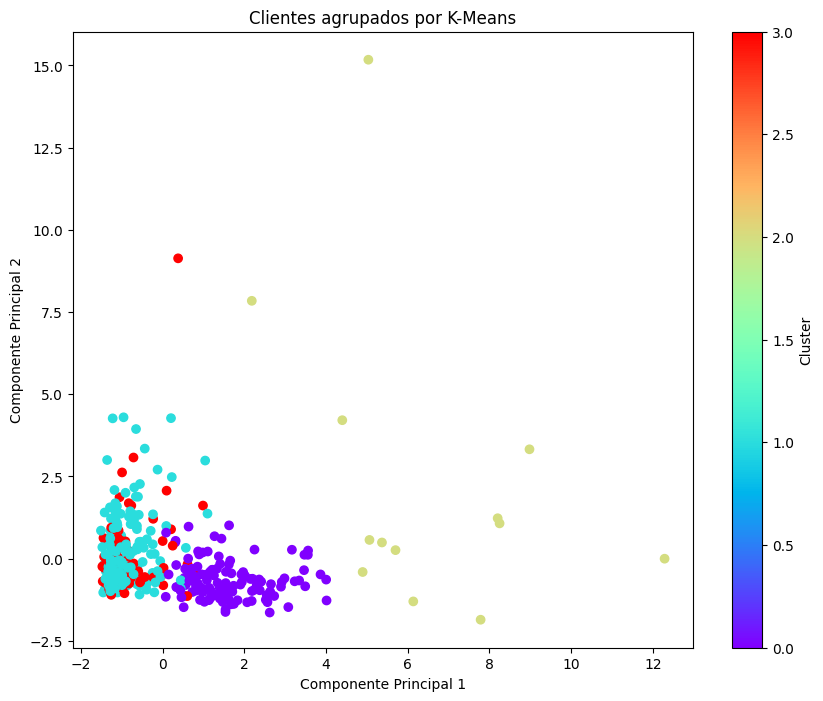

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clientes agrupados por K-Means')
plt.colorbar(label='Cluster')
plt.show()

In [29]:
df.groupby('Cluster').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,2.000000,2.674603,8130.031746,8874.071429,14139.150794,1339.476190,6104.936508,1542.706349
1,1.000000,3.000000,13297.947368,3168.306220,3740.588517,3436.971292,769.392344,1262.511962
2,1.846154,2.615385,25770.769231,35160.384615,41977.384615,6844.538462,19867.384615,7880.307692
3,1.054348,1.315217,12407.130435,3401.771739,4234.130435,4082.282609,864.739130,1198.402174


Método Silhouette

In [30]:
from sklearn.metrics import silhouette_score

In [33]:
for k in range(2,11):
  kmenas = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(X_scaled)
  score = silhouette_score(X_scaled, labels)
  print(f"k={k}, Silhouette Score={score:.4f}")

k=2, Silhouette Score=0.3482
k=3, Silhouette Score=0.3482
k=4, Silhouette Score=0.3482
k=5, Silhouette Score=0.3482
k=6, Silhouette Score=0.3482
k=7, Silhouette Score=0.3482
k=8, Silhouette Score=0.3482
k=9, Silhouette Score=0.3482
k=10, Silhouette Score=0.3482


In [39]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [37]:
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

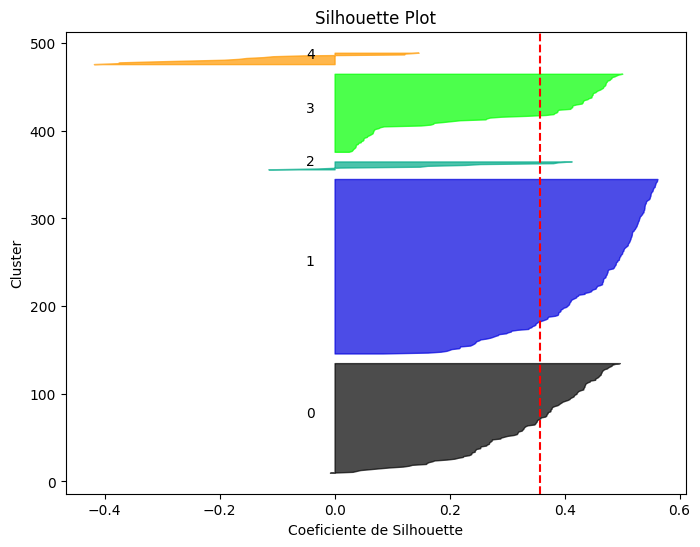

In [40]:
silhouette_vals = silhouette_samples(X_scaled, df['Cluster'])
y_lower = 10
plt.figure(figsize=(8,6))

for i in range(k):
    ith_cluster_silhouette_vals = silhouette_vals[df['Cluster'] == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.xlabel("Coeficiente de Silhouette")
plt.ylabel("Cluster")
plt.title("Silhouette Plot")
plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
plt.show()